<a href="https://colab.research.google.com/github/SundharessB/Reinforcement-Learning/blob/main/RL_LAB1_2348564.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Lab Exercise :1**

#**Implement Multi-Armed Bandit Problem from Scratch in Python**


##importing necessary libraries



In [12]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd

## class represents a multi-armed bandit problem solver using the epsilon-greedy strategy

In [3]:
class AdOptimizer:
    def __init__(self, num_ads, exploration_rate):
        self.num_ads = num_ads
        self.exploration_rate = exploration_rate
        self.pull_counts = np.zeros(num_ads)
        self.ad_values = np.zeros(num_ads)

    def explore_or_exploit(self):
        if np.random.rand() < self.exploration_rate:
            return np.random.randint(0, self.num_ads)
        else:
            return np.argmax(self.ad_values)

    def update_ad_value(self, chosen_ad, reward):
        self.pull_counts[chosen_ad] += 1
        count_val = self.pull_counts[chosen_ad]
        value_val = self.ad_values[chosen_ad]
        new_value = value_val + (1 / count_val) * (reward - value_val)
        self.ad_values[chosen_ad] = new_value


In [4]:
def simulate_ad_performance(num_impressions, num_ads, click_probs, exploration_rate):
    optimizer = AdOptimizer(num_ads, exploration_rate)
    total_rewards = 0
    ctr_over_time = {ad: [] for ad in range(num_ads)}

    for i in range(num_impressions):
        chosen_ad = optimizer.explore_or_exploit()
        reward = np.random.binomial(1, click_probs[chosen_ad])
        optimizer.update_ad_value(chosen_ad, reward)
        total_rewards += reward

        for ad in range(num_ads):
            ctr_over_time[ad].append(optimizer.ad_values[ad])

        if (i + 1) % 100 == 0:
            print(f"Impressions: {i + 1}, Total Clicks: {total_rewards}, Estimated CTRs: {optimizer.ad_values}")

    return optimizer.ad_values, total_rewards, ctr_over_time


## Simulation parameters


In [5]:
num_ads = 4
num_impressions = 1000
click_probs = [0.05, 0.04, 0.07, 0.03]
exploration_rate = 0.1

In [20]:

ad_clicks = np.random.binomial(1, click_probs, size=(num_impressions, num_ads))

cumulative_clicks = np.cumsum(ad_clicks, axis=0)


##Run the ad performance simulation


In [9]:
final_ctr_estimates, total_clicks, ctr_over_time = simulate_ad_performance(num_impressions, num_ads, click_probs, exploration_rate)

print("\nFinal estimated CTRs:", final_ctr_estimates)
print("Total clicks after 1000 impressions:", total_clicks)


Impressions: 100, Total Clicks: 4, Estimated CTRs: [0.04255319 0.         0.         0.        ]
Impressions: 200, Total Clicks: 8, Estimated CTRs: [0.04255319 0.         0.         0.        ]
Impressions: 300, Total Clicks: 14, Estimated CTRs: [0.04477612 0.06024096 0.         0.        ]
Impressions: 400, Total Clicks: 18, Estimated CTRs: [0.04782609 0.04444444 0.04       0.        ]
Impressions: 500, Total Clicks: 21, Estimated CTRs: [0.04467354 0.04117647 0.03703704 0.        ]
Impressions: 600, Total Clicks: 28, Estimated CTRs: [0.05141388 0.04117647 0.03703704 0.        ]
Impressions: 700, Total Clicks: 30, Estimated CTRs: [0.04411765 0.0441989  0.03571429 0.        ]
Impressions: 800, Total Clicks: 39, Estimated CTRs: [0.05300353 0.04301075 0.03333333 0.        ]
Impressions: 900, Total Clicks: 42, Estimated CTRs: [0.04984894 0.04278075 0.03125    0.        ]
Impressions: 1000, Total Clicks: 46, Estimated CTRs: [0.0489418  0.04255319 0.02941176 0.        ]

Final estimated CTRs

## Plotting the estimated CTRs over time


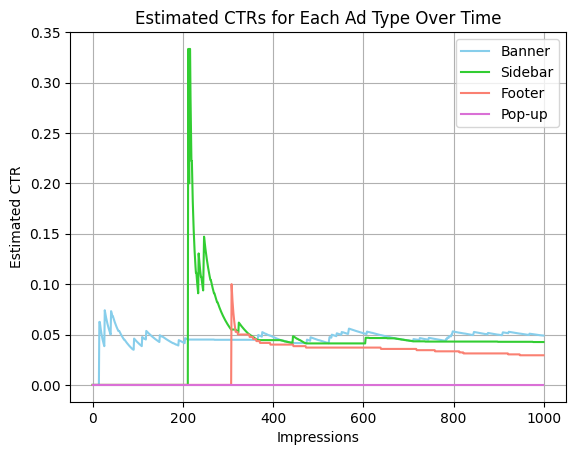

In [10]:
ad_names = ['Banner', 'Sidebar', 'Footer', 'Pop-up']
colors = ['skyblue', 'limegreen', 'salmon', 'orchid']

for ad in range(num_ads):
    plt.plot(ctr_over_time[ad], label=ad_names[ad], color=colors[ad])

plt.title("Estimated CTRs for Each Ad Type Over Time")
plt.xlabel("Impressions")
plt.ylabel("Estimated CTR")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff


## Interactive Dashboard: Create a line chart


In [18]:
time_series_df = pd.DataFrame(cumulative_clicks, columns=[f"Ad {i+1}" for i in range(num_ads)])
time_series_df["Impressions"] = np.arange(1, num_impressions + 1)
fig = px.line(time_series_df, x="Impressions", y=time_series_df.columns[:-1])
fig.update_layout(title="Ad Clicks Over Time", xaxis_title="Impressions", yaxis_title="Cumulative Clicks")
fig.show()


## Heatmap: Visualize ad clicks over time


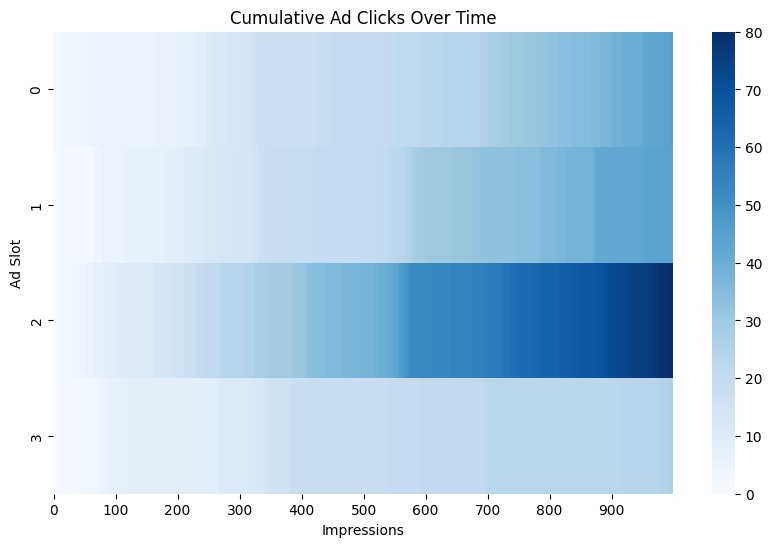

In [19]:
plt.figure(figsize=(10, 6))
sns.heatmap(cumulative_clicks.T, cmap='Blues', xticklabels=100, yticklabels=1)
plt.title("Cumulative Ad Clicks Over Time")
plt.xlabel("Impressions")
plt.ylabel("Ad Slot")
plt.show()
